# Multiple regression model

$$\textit{wage} = \beta_0 + \beta_1 \textit{educ} + \beta_2 \textit{exper} + u$$

# Measuring goodness of fit: R squared

Estimating coefficients of the linear regression using OLS means minimizing the *residual sum of squares* (RSS)

$$RSS = \sum_{i=1}^n(y_i - \hat{y_i})^2$$

![](assets/animation.gif)

$$TSS = \sum_{i=1}^n(y_i - \bar{y})^2$$

![](assets/tss2.svg)

$$ESS = \sum_{i=1}^n(\hat{y}_i - \bar{y_i})^2$$

![](assets/ESS.svg)

Our goal is to explan as much variability of our dependent variable as possible. R squared tells us the proportion of variability of dependent variable explained by the model

$$R^2 = 1 - \frac{RSS}{TSS} \qquad \qquad R^2 \in <0,1>$$

In [8]:
library(dplyr)
library(ggplot2)
data <- readr::read_csv("data/ceosal1.csv")

Rows: 209 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): salary, pcsalary, sales, roe, pcroe, ros, indus, finance, consprod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(data)

salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1095,20,27595.0,14.1,106.4,191,1,0,0,0
1001,32,9958.0,10.9,-30.6,13,1,0,0,0
1122,9,6125.9,23.5,-16.3,14,1,0,0,0
578,-9,16246.0,5.9,-25.7,-21,1,0,0,0
1368,7,21783.2,13.8,-3.0,56,1,0,0,0
1145,5,6021.4,20.0,1.0,55,1,0,0,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



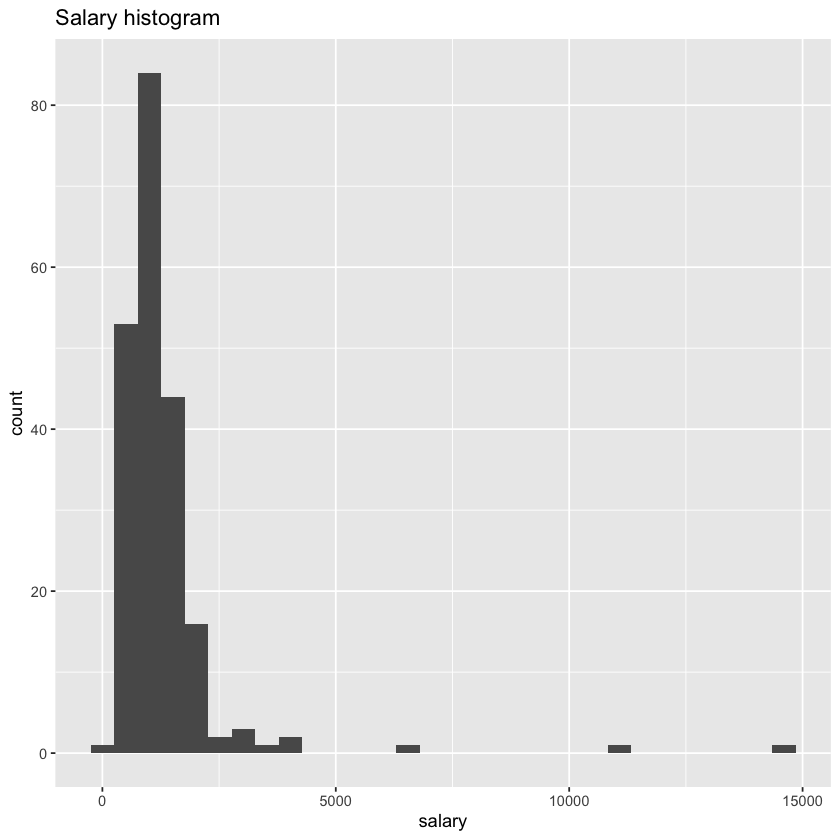

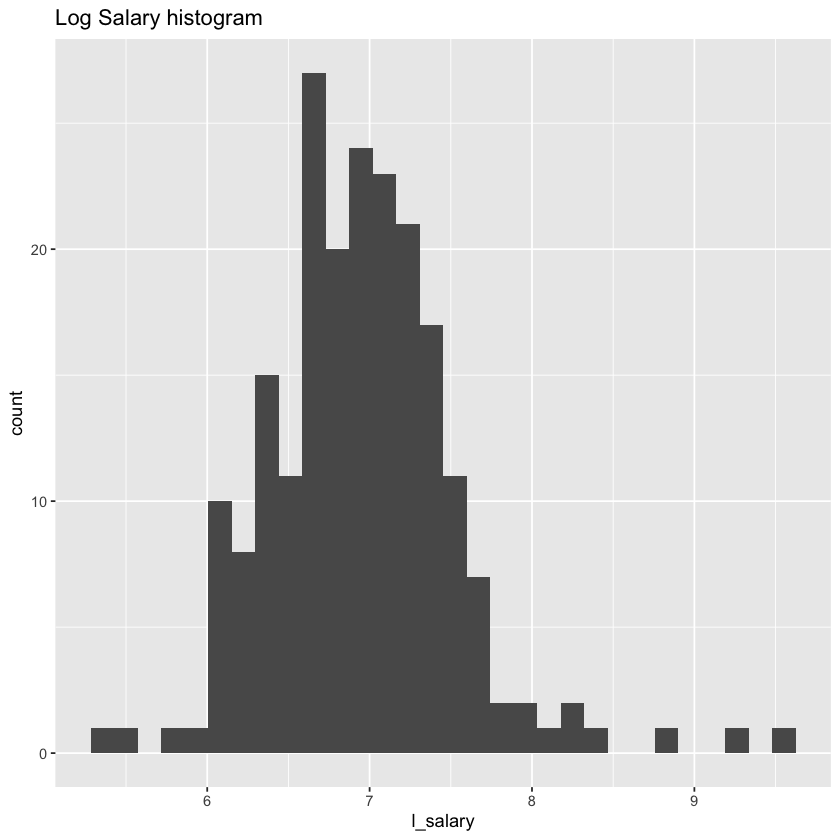

In [15]:
data %>%
select(salary)%>%
ggplot(aes(salary))+
geom_histogram()+
labs(title = "Salary histogram")

data %>%
mutate(l_salary = log(salary)) %>%
select(l_salary)%>%
ggplot(aes(l_salary))+
geom_histogram() +
labs(title = "Log Salary histogram")

In [18]:
options(scipen = 999)
model1 <- lm(salary ~ sales, data=data)
summary(model1)


Call:
lm(formula = salary ~ sales, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1463.7  -478.9  -241.4   123.1 13614.6 

Coefficients:
               Estimate  Std. Error t value            Pr(>|t|)    
(Intercept) 1174.004871  112.812678  10.407 <0.0000000000000002 ***
sales          0.015471    0.008906   1.737              0.0838 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1366 on 207 degrees of freedom
Multiple R-squared:  0.01437,	Adjusted R-squared:  0.009607 
F-statistic: 3.018 on 1 and 207 DF,  p-value: 0.08385
